##  загрузка  билиотек 

In [337]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer
import  torch
from sklearn.preprocessing import StandardScaler

In [83]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 2.1 Поиск ключевых слов/n-грамм. Векторизация текстов

In [317]:
df = pd.read_csv('articles.csv') # загружаем  данные  с прошлого модуля 
df

,Unnamed: 0,company_name,description,rating,industries,article_text,publish_date,views,preprocessed_text
0,0,Desktop/Data\Cybersport,нет информации,нет информации,нет информации,7 декабря состоялась церемония награждения лау...,2024-05-08 09:30:00,2300,декабря состоялась церемония награждения лауре...
1,1,Desktop/Data\ESforce Holding,нет информации,нет информации,нет информации,7 декабря состоялась церемония награждения лау...,2024-05-08 09:30:00,2300,декабря состоялась церемония награждения лауре...
2,2,Desktop/Data\ESforce Holding,нет информации,нет информации,нет информации,Из совместного исследования издателя компьютер...,2024-05-29 13:50:00,2800,совместного исследования издателя компьютерных...
3,3,Desktop/Data\ESforce Holding,нет информации,нет информации,нет информации,По статистике The Esports Observer за I полови...,2024-05-09 09:33:00,6200,статистике the esports observer i половину год...
4,4,Desktop/Data\ESforce Holding,нет информации,нет информации,нет информации,Компании SuperData Research и PayPal провели с...,2024-05-11 12:43:00,10000,компании superdata research paypal провели сов...
...,...,...,...,...,...,...,...,...,...
1107,1107,Desktop/Data\Федерация креативных индустрий,нет информации,нет информации,нет информации,"Привет, Хабр! Представляю вашему вниманию пере...",2024-05-30 10:43:00,9300,привет хабр представляю вашему вниманию перево...
1108,1108,Desktop/Data\Федерация креативных индустрий,нет информации,нет информации,нет информации,Источник\n«Умный человек не делает все ошибки ...,2024-05-24 12:37:00,7700,источник умный человек делает ошибки дает шанс...
1109,1109,Desktop/Data\Федерация креативных индустрий,нет информации,нет информации,нет информации,"Привет, Хабр! Сегодня мы решили поделиться с с...",2024-05-12 14:09:00,9300,привет хабр сегодня решили поделиться сообщест...
1110,1110,Desktop/Data\Федерация креативных индустрий,нет информации,нет информации,нет информации,"Привет! Меня зовут Никита Бокарев, я креативны...",2024-05-04 16:44:00,52000,привет зовут никита бокарев креативный продюсе...


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1112 non-null   int64 
 1   company_name       1112 non-null   object
 2   description        1112 non-null   object
 3   rating             1112 non-null   object
 4   industries         1112 non-null   object
 5   article_text       1112 non-null   object
 6   publish_date       1112 non-null   object
 7   views              1112 non-null   int64 
 8   preprocessed_text  1112 non-null   object
dtypes: int64(2), object(7)
memory usage: 78.3+ KB


выполним  разбивку  слов  на  ключевые  биграммы  , триграммы  ,  для этого векторизуем  текста 

In [28]:
russian_stop = stopwords.words("russian") 

In [183]:
df.drop(['Unnamed: 0' , 'description' , 'rating' , 'industries'] ,axis = 1, inplace = True)

In [185]:
texts = df["preprocessed_text"].tolist()

для векторизации текстов  выберем  tfidf так как оно подходит для  веткориизации большого  объема  текстов  и  для  векторизации документов  

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Создать вектор TF-IDF с параметрами n-грамм
vectorizer = TfidfVectorizer(stop_words=russian_stop)

# Извлечь TF-IDF веса из текста
tfidf_matrix = vectorizer.fit_transform(df['tokenized_text'])

# Извлечь ключевые слова/биграммы/триграммы
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка ключевых слов по TF-IDF
sorted_features = sorted(zip(tfidf_scores, feature_names), reverse=True)

# Вывести топ-10 ключевых слов/биграмм/триграмм
for score, feature in sorted_features[:10]:
    print(f"{feature}: {score:.3f}")

номинация: 0.710
рунет: 0.183
проект: 0.174
лауреат: 0.172
премия: 0.165
москва: 0.147
туризм: 0.140
правительство: 0.109
ооо: 0.103
индустрия: 0.094


как видим  самым  частотным  словом  является  номинация  , что  является  
логичным 

In [131]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

df_vec= pd.concat([df, tfidf_df], axis=1)



объединяем  биграммы  и  изначальный  набор  

## 2.2 Кластерный анализ

чтобы провести  кластеризацию  будем  использовать 3  разных  алгоритма ,  так же  будем  использовтаь векторное представление  модели  берт  ,  так  как она даст  лучшее качество  

In [262]:
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
model = BertModel.from_pretrained('DeepPavlov/rubert-base-cased', output_hidden_states = True)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [263]:
class CustomDataset(Dataset):
    
    def __init__(self, X):
        self.text = X

    def tokenize(self, text):
        return tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=150)

    def __len__(self):
        return self.text.shape[0]

    def __getitem__(self, index):
        output = self.text[index]
        output = self.tokenize(output)
        return {k: v.reshape(-1) for k, v in output.items()}


eval_ds = CustomDataset(df['company_name'] +df['preprocessed_text'])
eval_dataloader = DataLoader(eval_ds, batch_size=8)

In [264]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output['last_hidden_state']
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [291]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
model.eval()

embeddings = torch.Tensor().to(device)

with torch.no_grad():
    for n_batch, batch in enumerate(tqdm(eval_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        embeddings = torch.cat([embeddings, mean_pooling(outputs, batch['attention_mask'])])
    embeddings = embeddings.cpu().numpy()

100%|██████████| 139/139 [02:17<00:00,  1.01it/s]


In [268]:
embeddings
np.save('emb', embeddings)

так же  чтобы провизуализировать  кластеризацию  уменьшим  размерность векторного пространства  с  помощью  pca

будем использовать AgglomerativeClustering и KMeans для  построения  кластеров  так  как они самые быстрые  и  качественные  

In [341]:
scaler = StandardScaler()
embeddings_scale = scaler.fit_transform(embeddings)

In [342]:
clustering = AgglomerativeClustering(n_clusters=3 ).fit(embeddings)

In [343]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = clustering.labels_
emb_2d['label'].nunique() # 40



3

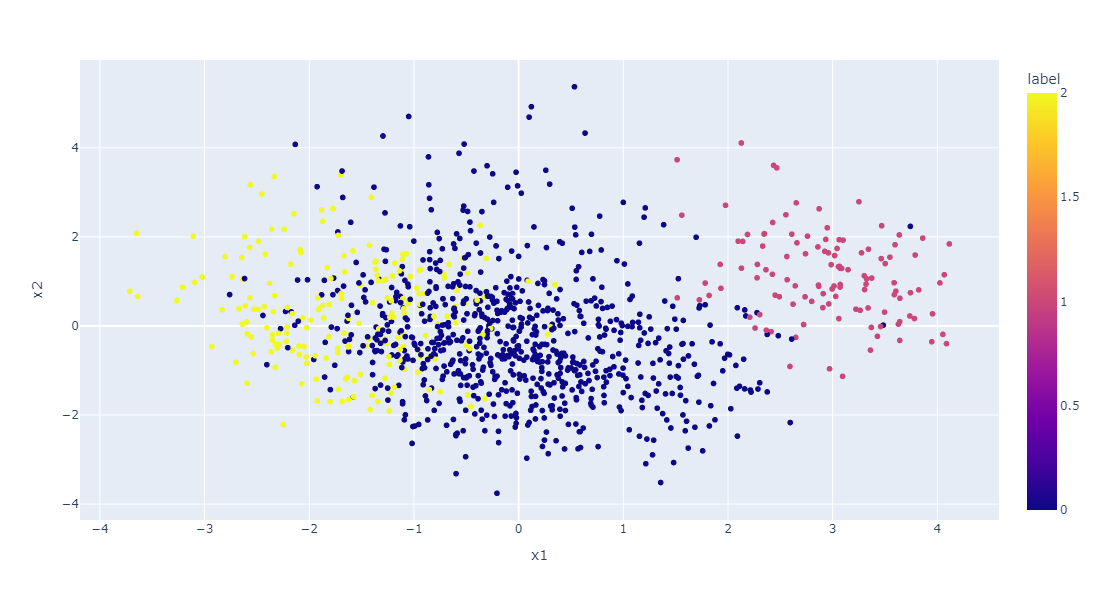

In [344]:
import plotly.express as px
fig = px.scatter(emb_2d, x='x1', y='x2', color='label', width=800, height=600)
fig.show()

In [351]:
scaler = StandardScaler()
embeddings_scale = scaler.fit_transform(embeddings)

In [352]:
clustering =  KMeans(n_clusters=3, random_state=0).fit(embeddings)

In [353]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = clustering.labels_
emb_2d['label'].nunique() 

3

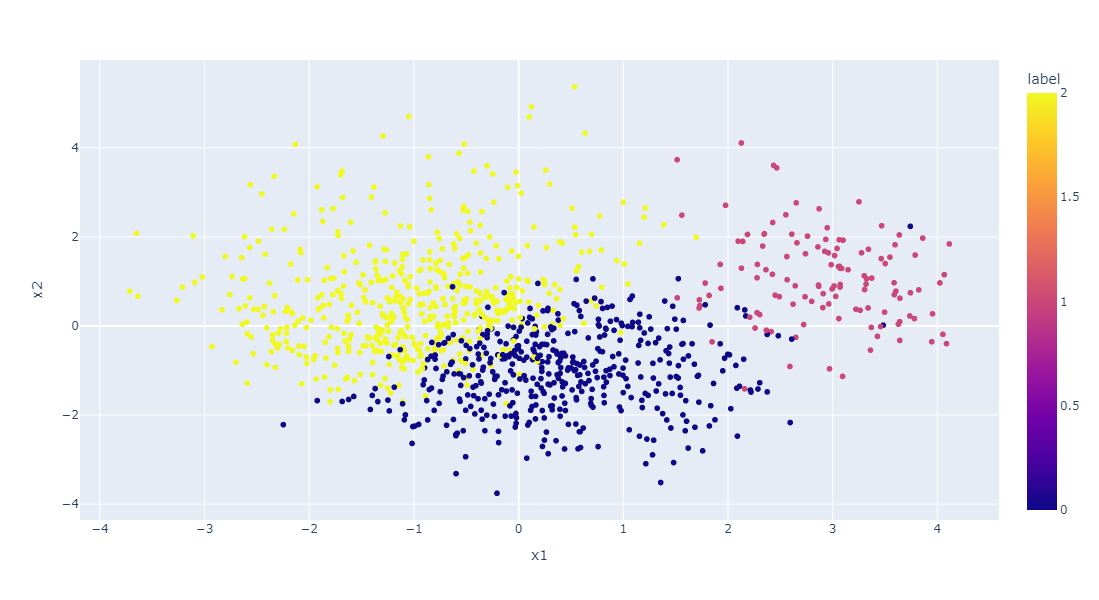

In [354]:
import plotly.express as px
fig = px.scatter(emb_2d, x='x1', y='x2', color='label', width=800, height=600)
fig.show()

по итогу  кластеризации лучше всего себя показал  KMean так как на графике  видно  что каждый  кластер  хорошо отделим  от другого  

In [61]:
!pip install pyldavis
!pip install pymorphy2
!pip install wordcloud
!pip install --upgrade gensim
!pip install nltk
!pip install smart_open==2.0.0
!pip install --upgrade -q pyldavis

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
    --------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.6 MB 2.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 MB 2.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.6 MB 4.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 5.6 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.6 MB 6.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 5.9 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp3

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have numpy 1.26.4 which is incompatible.
tts 0.22.0 requires pandas<2.0,>=1.4, but you have pandas 2.2.2 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0+cu121, but you have torch 2.3.0 which is incompatible.


   ---------------------------------------- 0.0/55.5 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.5 kB ? eta -:--:--
   ------------------------------------ --- 51.2/55.5 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 55.5/55.5 kB 580.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.2 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.2 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.2 MB 4.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.2 MB 6.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.2 MB 7.2 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.2 MB 7.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.2 MB 7.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.3/8.2 MB 9.1 MB/s eta 0:00:01
   ------------------ 

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.0 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.0 kB 487.6 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.0 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 1.5 MB/s eta 0:00:00


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ------- ----------------------------- 20.5/104.0 kB 320.0 kB/s eta 0:00:01
     --------------------- --------------- 61.4/104.0 kB 656.4 kB/s eta 0:00:01
     -----------------------------------  102.4/104.0 kB 980.4 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 597.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  error in smart_open setup command: 'python_requires' must be a string containing valid version specifiers; Invalid specifier: '>=3.5.*'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## 2.3 Тематическое моделирование  2.4 Визуализация текста


In [144]:
import os
import re
import numpy as np
import pandas as pd
from pprint import pprint
import json
from tqdm import tqdm
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
%matplotlib inline
import nltk
import pymorphy2
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

In [69]:
!pip install bertopic

     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB 960.0 kB/s eta 0:00:06
     - -------------------------------------- 0.2/5.2 MB 2.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.3/5.2 MB 2.6 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/5.2 MB 3.6 MB/s eta 0:00:02
     -------- ------------------------------- 1.1/5.2 MB 5.1 MB/s eta 0:00:01
     ------------ --------------------------- 1.6/5.2 MB 6.4 MB/s eta 0:00:01
     ------------ --------------------------- 1.6/5.2 MB 6.4 MB/s eta 0:00:01
     ---------------- ----------------------- 2.2/5.2 MB 6.0 MB/s eta 0:00:01
     --------------------- ------------------ 2.8/5.2 MB 6.9 MB/s eta 0:00:01
     -------------------------- ------------- 3.4/5.2 MB 7.5 MB/s eta 0:00:01
     ------------------------------ --------- 4.0/5.2 MB 7.9 MB/s eta 0:00:01
     ---------------------------------- ----- 4.5/5.2 MB 8.2 MB/s eta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have numpy 1.26.4 which is incompatible.
tts 0.22.0 requires pandas<2.0,>=1.4, but you have pandas 2.2.2 which is incompatible.


для тематического  моделирования как первый  алгоритм  будем  BERTopic так как он  подходит  для  тематического  моделирования 

In [226]:
from bertopic import BERTopic

topic_model = BERTopic(language="russian", calculate_probabilities=True, verbose=True, embedding_model ='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2' , n_gram_range=(2, 2))
topics, probs = topic_model.fit_transform(texts)

2024-05-12 15:29:54,009 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/35 [00:00<?, ?it/s]

2024-05-12 15:30:31,778 - BERTopic - Embedding - Completed ✓
2024-05-12 15:30:31,778 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-12 15:30:36,344 - BERTopic - Dimensionality - Completed ✓
2024-05-12 15:30:36,345 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-12 15:30:36,391 - BERTopic - Cluster - Completed ✓
2024-05-12 15:30:36,394 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-12 15:30:37,599 - BERTopic - Representation - Completed ✓


по итогу  модель выделила  три  топика  

In [227]:
freq = topic_model.get_topic_info()
freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,0,1058,0_это_которые_очень_просто,"[это, которые, очень, просто, нужно, время, ко...",[модерирую хабр периодами случаются недели мес...
1,1,40,1_такси_gett_uber_водителей,"[такси, gett, uber, водителей, компании, серви...",[виртуальная диспетчерская служба такси gettax...
2,2,14,2_номинация_проект_номинации_москвы,"[номинация, проект, номинации, москвы, рунета,...",[декабря состоялась церемония награждения лаур...


виделим  самые  частотные  слова для первого топика 

In [188]:
topic_model.get_topic(0)

[('это', 0.03883855819620256),
 ('которые', 0.01397598321920908),
 ('очень', 0.013417349593610082),
 ('просто', 0.011352286040631801),
 ('нужно', 0.011093081297266147),
 ('время', 0.010990697662186319),
 ('который', 0.010434104679784884),
 ('всё', 0.009710900384503614),
 ('например', 0.00934753348344837),
 ('работы', 0.008604927974615234)]

выводим  самые  частотные  слова в  каждом  топике с их  вероятностями  

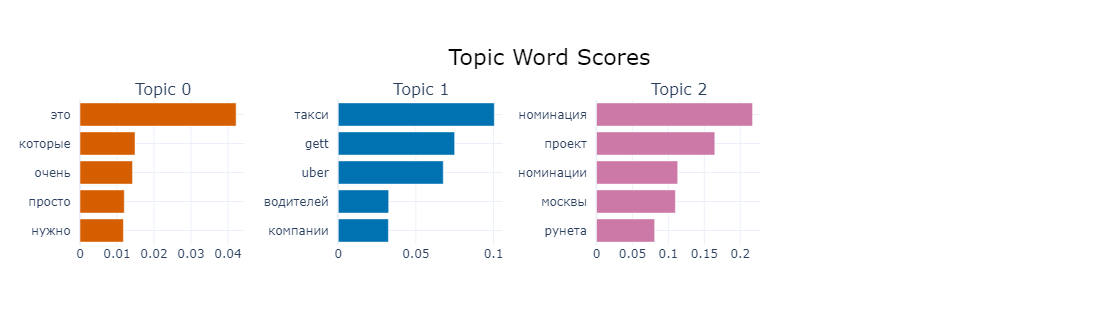

In [355]:
topic_model.visualize_barchart() 

слово  это  не явлется  стоп  словом  но  может  являться  незначимым  все остальные  топики  выглядит  по  словам  адекватно  

построим  дерево  по  которому  определяется топик 

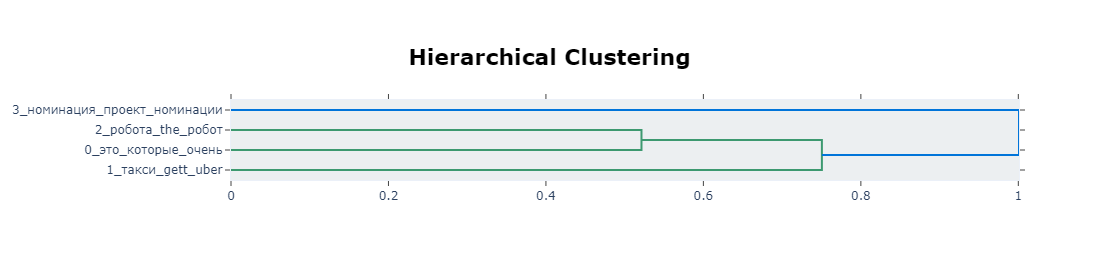

In [191]:
topic_model.visualize_hierarchy(top_n_topics=50)

так как слово  это самое  частотное  для  первого топика  переделаем  распределение  слов  

In [193]:
topic_model.update_topics(texts, n_gram_range=(2, 3))

In [194]:
topic_model.get_topic(0)

[('http http', 0.002390104135926318),
 ('http http http', 0.0023412421278813595),
 ('самом деле', 0.0015241673547017722),
 ('лицензия apache', 0.001171566874238606),
 ('таким образом', 0.0011343908895458483),
 ('это очень', 0.0010574364117981766),
 ('рейтинг github', 0.0009942215473473914),
 ('точки зрения', 0.0009789630096928652),
 ('всё это', 0.0007623987143153436),
 ('сих пор', 0.0007416616406287742)]

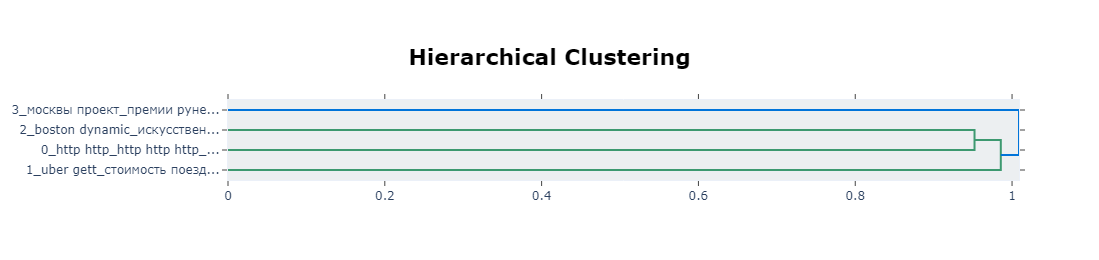

In [195]:
topic_model.visualize_hierarchy(top_n_topics=150)

как итог  топиков  стало  больше и  они  больше  походят на номациии для премии  

Алгоритм LDA
Latent Dirichlet Allocation (LDA):

LDA является одним из наиболее популярных и широко используемых алгоритмов тематического моделирования. Он основан на предположении, что каждый документ можно представить как смесь различных тем, а каждая тема представляет собой распределение вероятностей слов. LDA исходит из статистических моделей, которые объясняют, как слова в документах распределяются среди различных тем. Поэтому LDA часто используется для идентификации тем в текстовых данных.

чтобы визуализировать  LDA будем  использовать  TSNE  

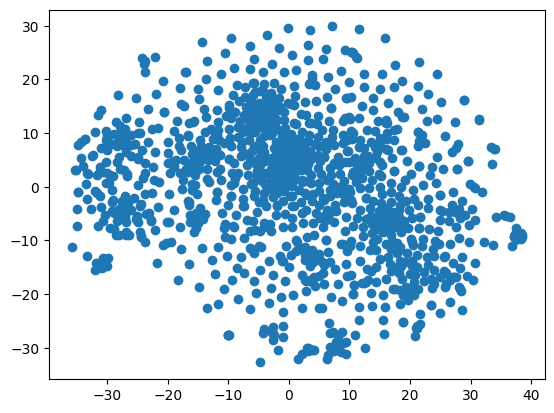

Topic 1:
компания года компании россии сервис рублей году около также компаний

Topic 2:
это которые очень нужно всё время просто компании работы который

Topic 3:
skillbox курс приложения код приложение разработчик записи кода хабр помощи

Topic 4:
всем сайте место стало одного одним самого котором это той

Topic 5:
сайте компаний нем могут пользователей новый количество место стало одного

Topic 6:
сайт сегодня видео google тех всем работают прямо новый интересно

Topic 7:
проект стали году сайте сервис каждой посмотреть россии это интересно

Topic 8:
вместо вопрос сразу сайте место стало одного одним самого всем

Topic 9:
сайте место стало одного одним самого всем котором это той

Topic 10:
пользователей вопросы могут сайте место стало одного одним самого всем



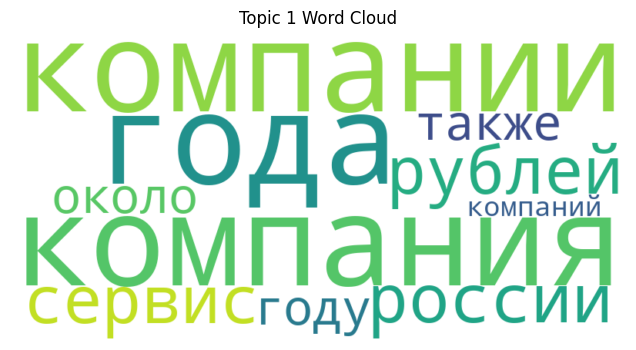

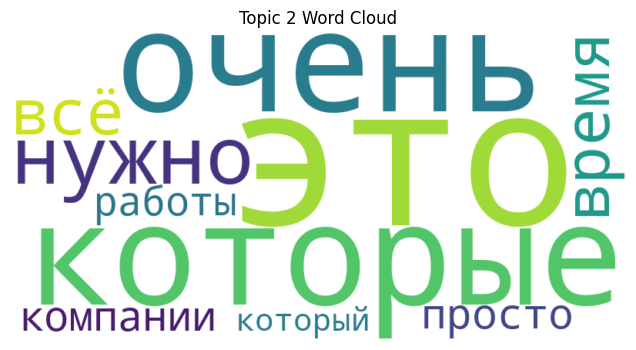

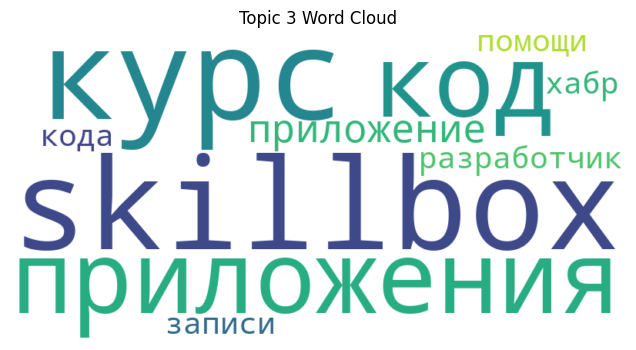

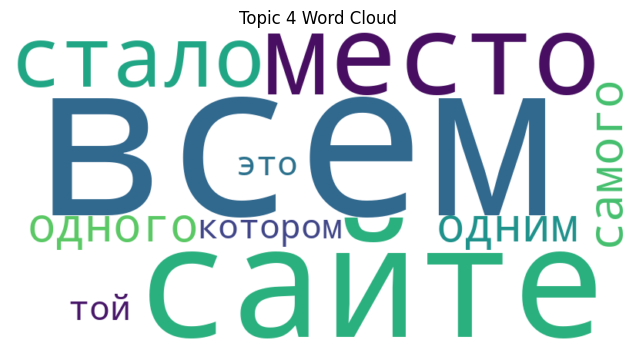

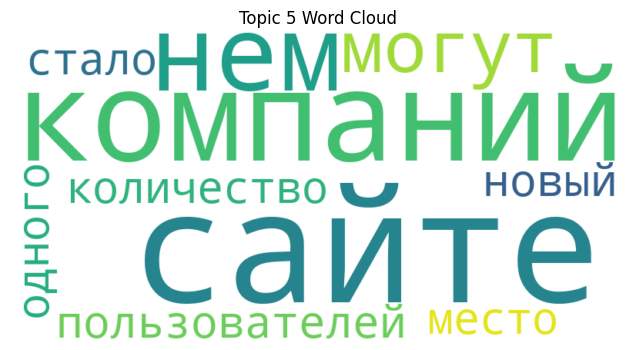

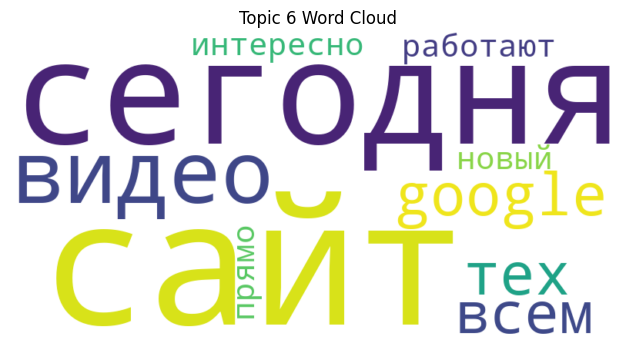

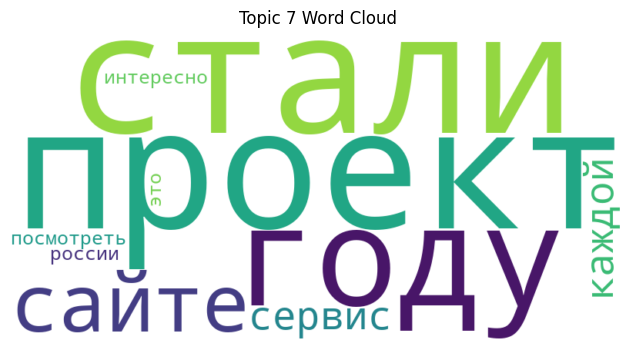

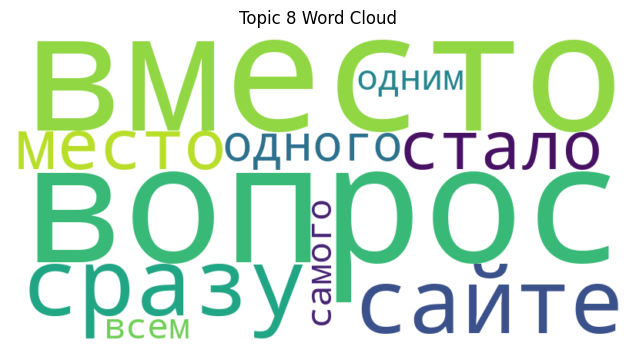

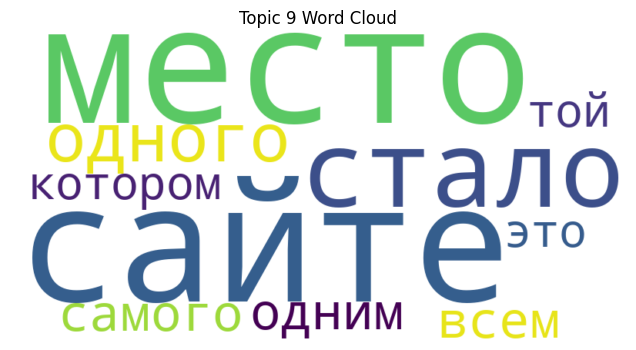

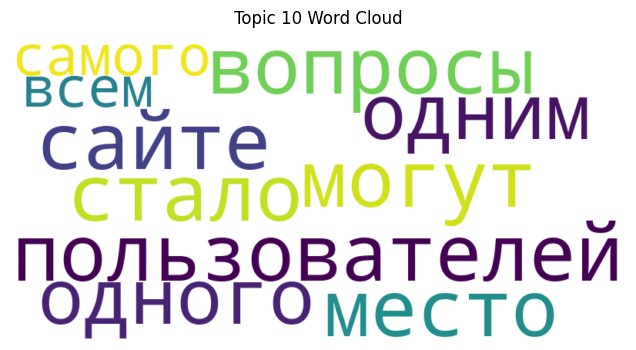

In [259]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words=russian_stop, max_df=0.9, min_df=0.2)

# Fit the vectorizer to the data
data_text_modeling = vectorizer.fit_transform(df['preprocessed_text'])

# Create an LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the LDA model to the data
lda.fit(data_text_modeling)

tsne_model = TSNE(n_components=2 , init = 'random')

# Fit the TSNE object to the data
tsne_results = tsne_model.fit_transform(data_text_modeling)

# Create a scatter plot of the TSNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.show()
# Print the topics
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Visualize the word cloud for each topic
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()